## Exemplo PPBIO

In [16]:
import matplotlib.pyplot as plt
import numpy as np

### 1. Parametros de entrada

#### Schott for BK7

All the informations about the BK7 refractive indexes can be found in: [SCHOTT](http://refractiveindex.info/download/data/2017/schott_2017-01-20.pdf)

Bellow are refractive index to the choosed wavelenght of $\lambda=670 nm$ obtained from the website [RefractiveIndex.Info](https://refractiveindex.info/?shelf=glass&book=BK7&page=SCHOTT)

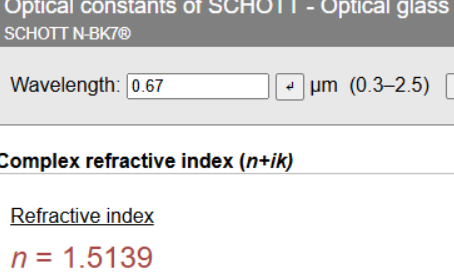

#### Angulo de incidência

$\theta = 68\degree$

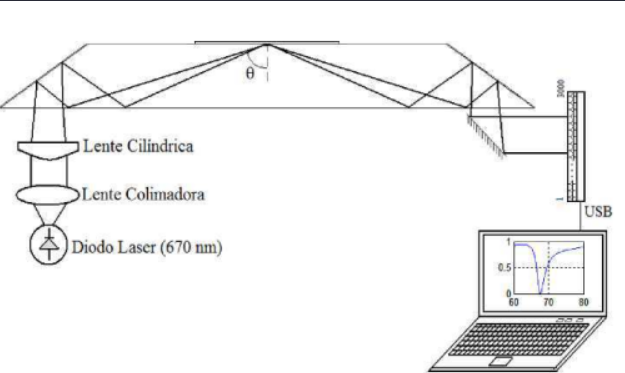

#### Diodo Laser: RLT67300T

Lasing Wavelength: typ. 670 nm 

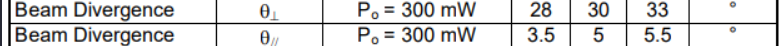

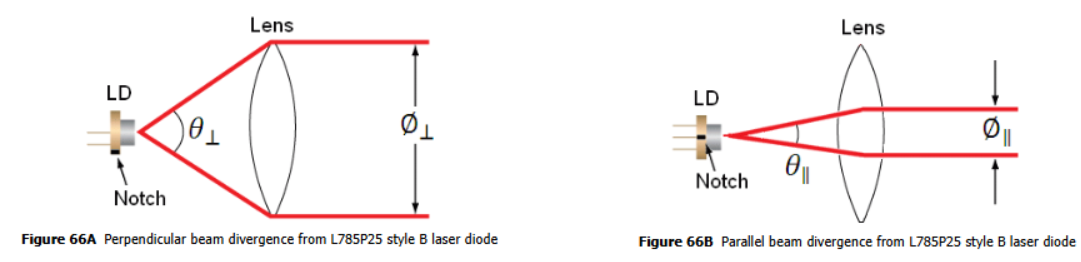

$f = \frac{\frac{\phi_1}{2}}{\tan{(\theta_\perp/2)}}$

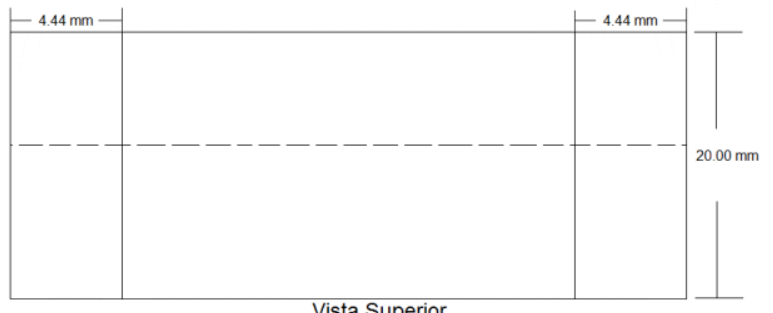
$\phi_1 = 20mm/2 = 10mm$

In [ ]:
# Parâmetros de entrada (PPBIO - CLEOMAR)
lambda0 = 670e-9                # Comprimento de onda do feixe (m)
P = 0.3           # Potência óptica (W)
theta0x = 5*0.5*np.pi/180;
theta0y = 30*0.5*np.pi/180;
D = 1e-2
fc = (D/2)/np.tan(theta0y)      # Distância focal da lente colimadora (m)
ff = 20e-3                      # Distância focal da lente focalizadora (m)
np_ = 1.5139                    # Índice de refração do prisma
theta = np.radians(68)          # Ângulo de incidência em Sa (rad)

### 2. Parâmetros iniciais do feixe Gaussiano

Seja $\theta_0x$ a divergência do laser na direção paralela a polarização e $\lambda$ o comprimento de onda do laser no vácuo, a cintura do feixe $W_{0x}$ e a profundidade de $Rayleigh$ ($z_0x$) são dados por

$$W_{0x} = \frac{\lambda}{\pi\theta_0x}$$
$$z_0x = \frac{\lambda}{\pi\theta_{0x}^2}

In [18]:
# 1. Parâmetros iniciais do feixe Gaussiano
W0x = lambda0 / (np.pi * theta0x)
W0y = lambda0/ (np.pi * theta0y)
z0x = lambda0 / (np.pi * theta0x**2)
print(f'W0x = {W0x*1e3:.2e}mm', f'z0x = {z0x*1e3:.2e}mm')

W0x = 4.89e-03mm z0x = 1.12e-01mm


### 3. Transformação pela lente colimadora

Na colimação, colocamos a lente colimadora à uma distãncia de cintura do feixe do laser igual a distância focal $z=f_c+z_0x$, calculando as magnificações:

\begin{align}
    r &=& \frac{z_{0x}}{z - f_c} &=& 1 \\
    M_r &=& \left|\frac{f_c}{z_{0x}}\right|\\
    M &=& \frac{1}{\sqrt 2}\left|\frac{f_c}{z_{0x}}\right|\\
\end{align}

Portanto

\begin{align}
    W_{0xc} &=& \frac{1}{\sqrt 2}\left|\frac{f_c}{z_{0x}}\right| W_{0x}\\
    z_{xc}' &=& \left(\frac{f_c^2}{2z_{0x}^2}\right) z_{0x} + f_c\\ 
    z_{0xc} &=& \left(\frac{f_c^2}{2z_{0x}^2}\right) z_{0x}\\
\end{align}

In [19]:
# 3. Transformação pela lente colimadora
r = 1.0  # Calculado como z0x / (z - fc), onde z = fc + z0x
Mr = fc / z0x
M = Mr / np.sqrt(1 + r**2)
W0xc = M * W0x
z0xc = (fc**2) / (2 * z0x)
z_xc_prime = (fc**2 / (2 * z0x)) + fc
print(f'Mr = {Mr:.2e}', f'M = {M:.2e}',f'W0xc = {W0xc*1e3:.2e}mm')
print(f'z0xc = {z0xc*1e3:.2e}mm',f'z_xc_prime = {z_xc_prime*1e3:.2e}mm')

Mr = 1.67e+02 M = 1.18e+02 W0xc = 5.76e-01mm
z0xc = 1.55e+03mm z_xc_prime = 1.57e+03mm


### 4. Transformação pela lente focalizadora e refração no prisma

Agora, colocamos a lente focalizadora sobre a cintura do feixe colimado (ver livro Seção 3.2.B - Beam Focusing):

\begin{align}
W_{0xf} &=& \frac{W_{0xc}}{\sqrt{1 + (z_{0xc}/f_f)^2}} \\
z_{xf}' &=& \frac{f_f}{1 + (f_f/z_{0xc})^2}\\
z_{0xf} &=& \frac{z_{0xc}}{1 + (z_{0xc}/f_f)^2}
\end{align}

Por fim, a refração na base do PPBIO. Em coordenadas do feixe focalizado, a refração, que ocorre a uma distância $d$ da lente focalizadora, ocorrerá em uma posição $z = -z_{xf}' + d$. A refração transforma o parâmetro $q_1$ do feixe incidente em $q_2$ do feixe transmitido por: $q_2 = n_p q_1$.

\begin{gather}
q_{xr} = n_pq_{xf} = n_p(d - z_{xf}) + j n_p z_{0f}\\
\implies z_{xr}' = n_p(z_{xf}' - d)\\
\implies z_{0xr} = n_p z_{0xf}
\end{gather}

por consequência

\begin{equation}
W_{0xr} = \sqrt{\frac{(λ/n_p)z_{0xr}}{π}} = \sqrt{\frac{(λ/n_p)n_p z_{0xf}}{π}} = W_{0xf}
\end{equation}

Para que o foco do feixe refratado ocorra sobre a superfície sensora, $z_{xr}' = d_p$, onde d_p é o caminho óptico percorrido no interior do prisma da base até a área sensível, contando todas as reflexões. Assim

\begin{equation}
d = z_{xf}' - \frac{d_p}{n_p}
\end{equation}

De posse de $z_{0xr}$, basta conhecer o comprimento de onda para que possamos caracterizar o feixe completamente. O comprimento de onda no interior do prisma é $\lambda/n_p$.

In [20]:
# 4.1 Transformação pela lente focalizadora
W0xf = W0xc / np.sqrt(1 + (z0xc / ff)**2)
z_xf_prime = ff / (1 + (ff / z0xc)**2)
z0xf = z0xc / (1 + (z0xc / ff)**2)

# 4.2 Refração no prisma
z0xr = np_ * z0xf
W0xr = W0xf

### 5. Cálculo da distribuição do campo eletrico ao longo de S

Vamos analisar a incidência oblíqua desse feixe focado na superfície sensível. Na imagem a seguir segue uma ilustração do problema:

![image.png](attachment:image.png)

Queremos encontrar duas coisas: o campo elétrico incidente sobre Sa e o gradiente da fase (direção de propagação) do campo incidente em pontos de Sa. Da imagem chamaremos o ângulo $o$ de $\theta$. Podemos expressar encontrar $x$ e $z$ em coordenadas de feixe que expressam pontos $s$ sobre a superfície Sa (paralelos ao vetor $\hat s$):

\begin{gather}
x = s\cos\theta\\
z = -s\sin\theta
\end{gather}

Substituindo esse valores nas expressões de gradiente de fase e campo elétrico, podemos descrever a distribuição de intensidade no spot formado na área sensível bem como o espectro angular de incidência e sua distribuição no plano sensível.

In [83]:
# 5. Pontos ao longo de Sa
s_lim = 4*W0xr*z0xr/np.sqrt(z0xr**2 - (W0xr**2)*np.sin(theta)**2)
print(s_lim)

s = np.linspace(-s_lim,s_lim, 10000)  # Valores de s (m)
x = s * np.cos(theta)
z = -s * np.sin(theta)

2.963647516455471e-05


Seja a fase do feixe incidente sobre a superfície sensível dada por

\begin{equation}
\varphi_{xr}(z) = kz - \zeta_{xr}(z) + \frac{kx^2}{2R_{xr}(z)}
\end{equation}

Sendo

\begin{gather}
R(z) = z\left[1 + \left(\frac{z_0}{z}\right)^2\right]\\
\zeta(z) = \arctan\frac{z}{z_0}\\
\end{gather}

In [84]:
# 6. Cálculo da fase
R_xr = z * (1 + (z0xr / (z)))**2  # Evitar divisão por zero
zeta_xr = np.arctan(z / z0xr)

k = 2 * np.pi * np_ / lambda0
phi_xr = k * z - zeta_xr + (k * x**2) / (2 * (R_xr))  # Evitar divisão por zero

o campo elétrico é dado por (ver livro seção 5.4-A: The Gaussian Beam)

\begin{equation}
\mathbf E_{xr}(\mathbf r) = E_0\left(-\hat x + \frac{x}{z + jz_{0xr}}\right)U_{xr}(\mathbf r)
\end{equation}

onde 

\begin{equation}
U_{xr}(\mathbf r) = A_0\frac{W_{0xr}}{W_{xr}(z)}\exp\left[-\frac{x^2}{W_{xr}^2(z)}\right]\exp[-j\varphi_{xr}(z)]
\end{equation}

Em que 

\begin{gather}
W(z) = W_0\sqrt{1 + \left(\frac{z}{z_0}\right)^2}\\
\end{gather}

In [85]:
# 8. Campo elétrico
W_xr = W0xr * np.sqrt(1 + (z / z0xr)**2)
#W0x = lambda0 / (np.pi * theta0x)
#W0y = lambda0/ (np.pi * theta0y)
# Intensidade máxima
I0 = (2 * P) / (np.pi * W_xr**2)
I0 = I0#/np_
# Pico do campo elétrico
A0 = np.sqrt(2 * P / (np.pi*W0xr**2))
A0 = A0
U_xr = A0 * (W0xr / W_xr) * np.exp(-x**2 / W_xr**2) * np.exp(-1j * phi_xr)
vector_term = -1 + (x / (z + 1j * z0xr))
E_xr = vector_term * U_xr

# Beam Intensity
I_xr = I0*np.exp(-(2*x**2)/(W_xr**2))

O gradiente da fase no plano $xz$ é

\begin{equation}
\vec∇\varphi_{xr}(z) = \frac{kx}{R_{xr}(z)}\hat x + \left[k - \frac{k x^2}{2R_{xr}^2(z)}\left(1 - \frac{z_{0xr}^2}{z^2}\right) - \frac{W_{0xr}^2}{W_{xr}^2(z)}\right]\hat z
\end{equation}

In [ ]:
# 9. Gradiente de fase
dphi_dx = (k * x * z) / (z**2 + z0xr**2)#(k * x) / (R_xr + 1e-20)
dphi_dz = (k 
           - (z0xr / (z**2 + z0xr**2)) 
           + (k * x**2 * (z0xr**2 - z**2)) / (2 * (z**2 + z0xr**2)**2)
)#k - (k * x**2)/(2 * (R_xr + 1e-20)**2) * (1 - (z0xr**2)/(z**2 + 1e-20)) - (W0xr**2)/(W_xr**2 + 1e-20)

k_vec = np.vstack([dphi_dx, dphi_dz])

k_vec = k_vec/np.linalg.norm(k_vec, axis=0)
norm = np.array([[np.sin(theta), np.cos(theta)]]).T

incidence_angle = (np.arccos(norm.T @ k_vec).flatten())*180/(np.pi)

[68.11458417 68.11453858 68.114493   ... 68.114493   68.11453858
 68.11458417]


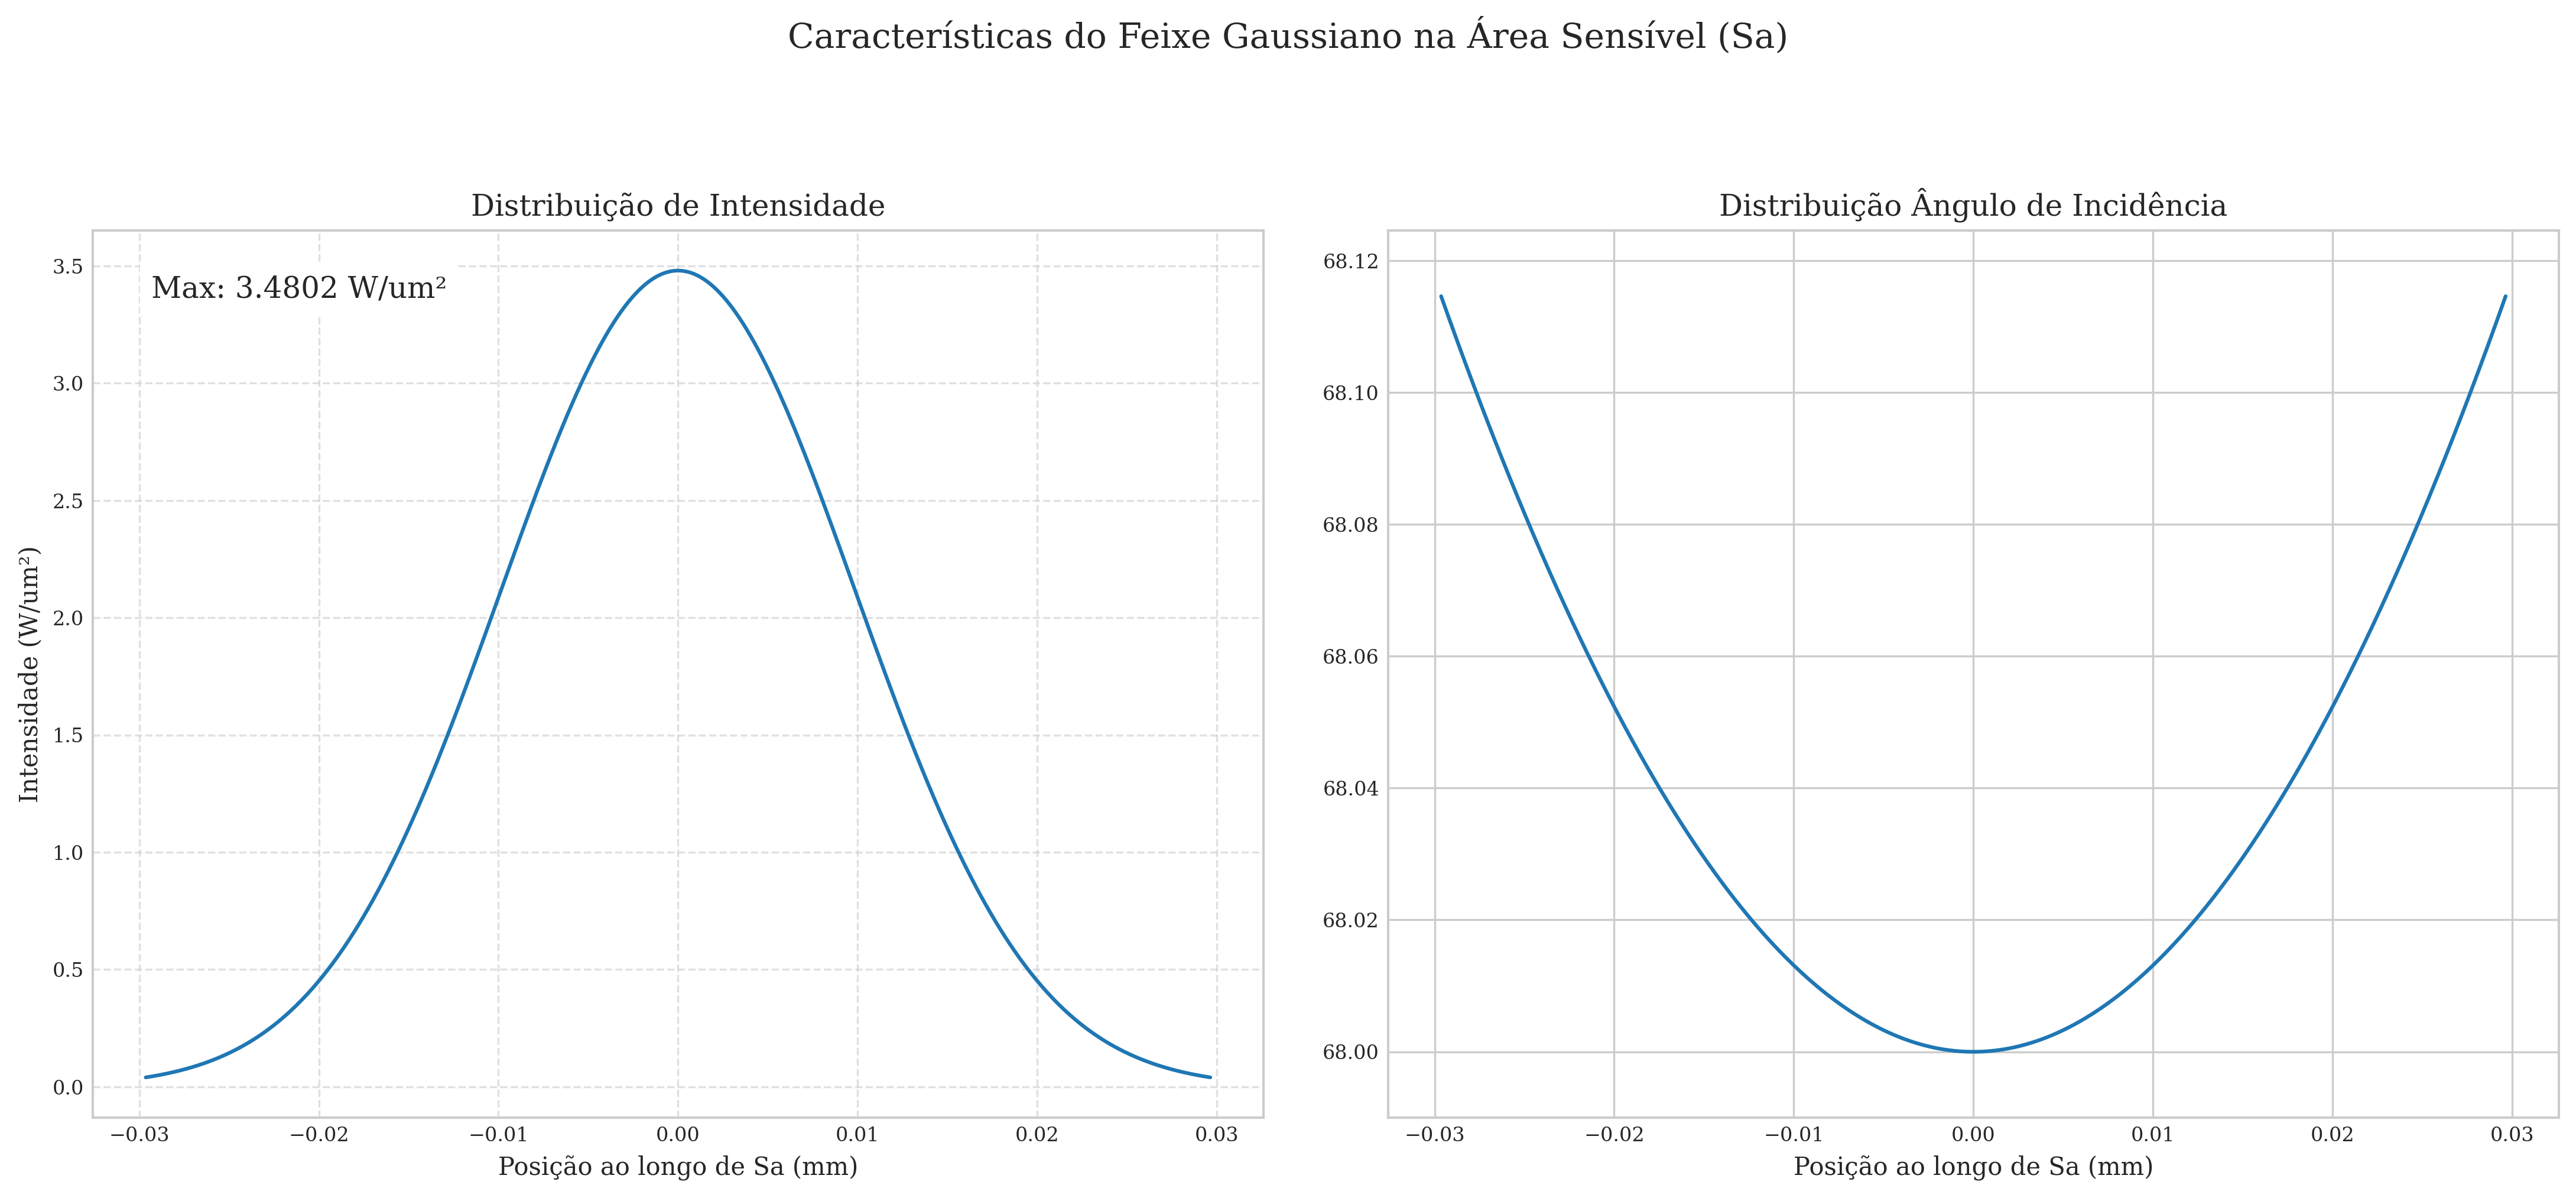

In [87]:
import numpy as np
import matplotlib.pyplot as plt
# Configuração geral do estilo dos gráficos
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'mathtext.fontset': 'stix',
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8
})
# Criação da figura
fig = plt.figure(figsize=(15, 12), dpi=300)
fig.suptitle('Características do Feixe Gaussiano na Área Sensível (Sa)', y=1.02, fontsize=14)

# Gráfico 1: Intensidade
ax1 = plt.subplot(2, 2, 1)
ax1.plot(s*1e3, I_xr*1e-9, 
        color='#1f77b4', linewidth=1.5, 
        label=r'$I(s) = |E(s)|^2$')
ax1.set_title('Distribuição de Intensidade')
ax1.set_xlabel('Posição ao longo de Sa (mm)')
ax1.set_ylabel('Intensidade (W/um²)')
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.annotate(f'Max: {np.max(I_xr)*1e-9:.4f} W/um²', 
            xy=(0.05, 0.95), xycoords='axes fraction',
            ha='left', va='top', backgroundcolor='white')

# Gráfico 2: Gradiente de Fase
ax2 = plt.subplot(2, 2, 2)
Q = ax2.plot(s*1e3,incidence_angle)
ax2.set_title('Distribuição Ângulo de Incidência')
ax2.set_xlabel('Posição ao longo de Sa (mm)')
ax2.set_ylim(min(incidence_angle)-1e-2,max(incidence_angle)+1e-2)
# Ajustes finais
plt.tight_layout(pad=2.0)
plt.subplots_adjust(top=0.92)
plt.show()